In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [2]:
dt = pd.read_csv('Loan Prediction Dataset.csv')
dt.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
dt.shape

(614, 13)

In [4]:
dt.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Data Cleaning

## Missing Data

In [6]:
dt.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

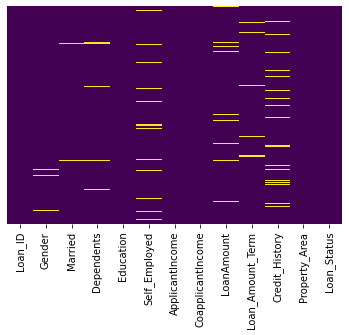

In [7]:
sns.heatmap(dt.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
# how many total missing values do we have?
total_cells = np.product(dt.shape)
total_missing = dt.isnull().sum().sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

1.8667000751691305


About 2% of the values in our dataset are missing.

## Data Cleaning

We want to fill the missing data instead of just dropping the missing rows. One way to do this is by filling in the mean of all the numerical attributes & mode of all the categorical attributes. 

In [9]:
# fill the missing values for numerical terms
dt['LoanAmount'] = dt['LoanAmount'].fillna(dt['LoanAmount'].mean())
dt['Loan_Amount_Term'] = dt['Loan_Amount_Term'].fillna(dt['Loan_Amount_Term'].mean())
dt['Credit_History'] = dt['Credit_History'].fillna(dt['Credit_History'].mean())

#fill the missing values for categorical terms
dt['Gender'] = dt['Gender'].fillna(dt['Gender'].mode()[0])
dt['Married'] = dt['Married'].fillna(dt['Married'].mode()[0])
dt['Dependents'] = dt['Dependents'].fillna(dt['Dependents'].mode()[0])
dt['Self_Employed'] = dt['Self_Employed'].fillna(dt['Self_Employed'].mode()[0])

In [10]:
dt.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Exploratory Data Analysis

## Categorical Attributes Visualization

Male      81.758958
Female    18.241042
Name: Gender, dtype: float64

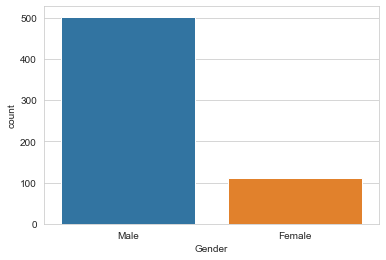

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Gender',data=dt)
(dt['Gender'].value_counts(normalize=True)).mul(100)

About 82% of the loan applicants are male while 18% are female.

Yes    65.309446
No     34.690554
Name: Married, dtype: float64

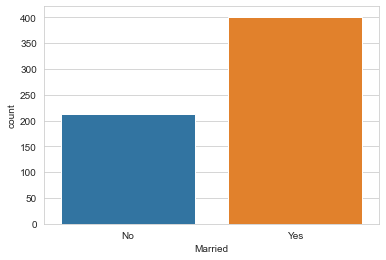

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Married',data=dt)
(dt['Married'].value_counts(normalize=True)).mul(100)

About 65% of the loan applicants are married while 35% are not married.

0     58.631922
1     16.612378
2     16.449511
3+     8.306189
Name: Dependents, dtype: float64

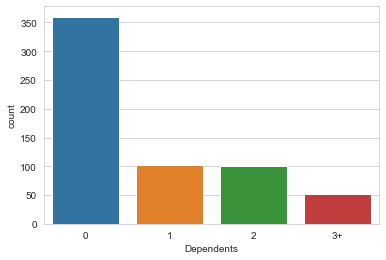

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Dependents',data=dt)
(dt['Dependents'].value_counts(normalize=True)).mul(100)

About 59% of the loan applicants have no dependents, 17% have 1 dependent, 16% have 2 dependents and 8% have 3 or more than 3 dependents.

Graduate        78.175896
Not Graduate    21.824104
Name: Education, dtype: float64

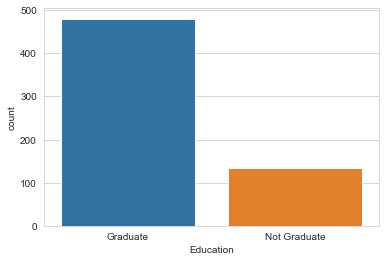

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='Education',data=dt)
(dt['Education'].value_counts(normalize=True)).mul(100)

About 78% of the loan applicants are graduates while 22% are not graduates.

No     86.644951
Yes    13.355049
Name: Self_Employed, dtype: float64

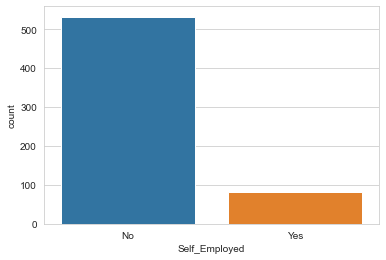

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='Self_Employed',data=dt)
(dt['Self_Employed'].value_counts(normalize=True)).mul(100)

About 87% of the loan applicants are not self employed while 13% are self employed.

Semiurban    37.947883
Urban        32.899023
Rural        29.153094
Name: Property_Area, dtype: float64

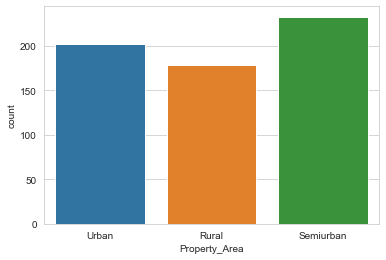

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='Property_Area',data=dt)
(dt['Property_Area'].value_counts(normalize=True)).mul(100)

About 38% of the loan applicants live in semiurban areas, 33% live in urban areas and 29% live in rural areas.

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

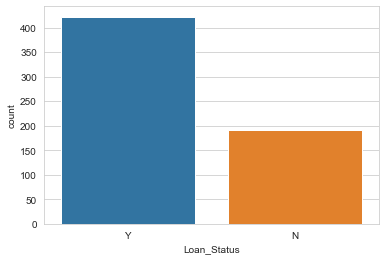

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='Loan_Status',data=dt)
(dt['Loan_Status'].value_counts(normalize=True)).mul(100)

About 69% of the loan applicants had their loan approved while 31% got their loan rejected.

## Numerical Attributes Visualization

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

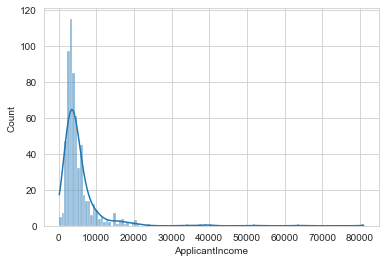

In [18]:
sns.set_style('whitegrid')
sns.histplot(dt['ApplicantIncome'], kde=True)

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

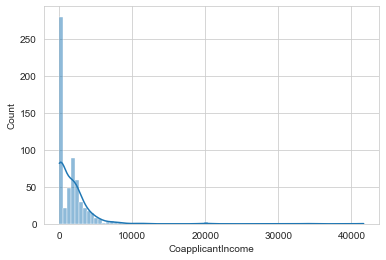

In [19]:
sns.set_style('whitegrid')
sns.histplot(dt['CoapplicantIncome'], kde=True)

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

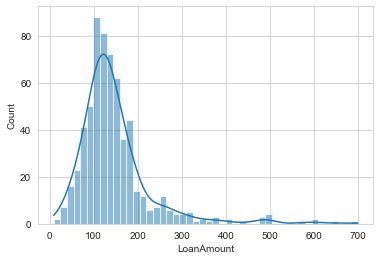

In [20]:
sns.set_style('whitegrid')
sns.histplot(dt['LoanAmount'], kde=True)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Count'>

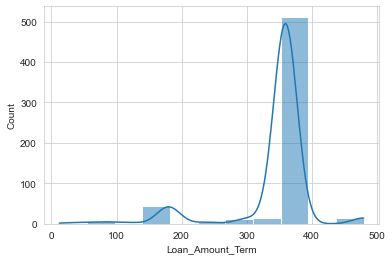

In [21]:
sns.set_style('whitegrid')
sns.histplot(dt['Loan_Amount_Term'], kde=True)

<AxesSubplot:xlabel='Credit_History', ylabel='Count'>

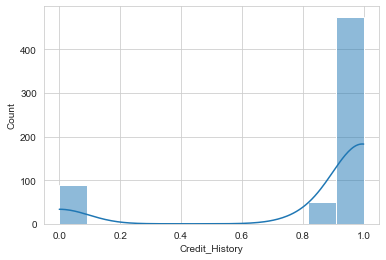

In [22]:
sns.set_style('whitegrid')
sns.histplot(dt['Credit_History'], kde=True)

# Feature Engineering

## Creation of New attributes

We will create a new attribute 'Total_Income' as the sum of the Applicant Income and the Coapplicant Income as these two attributes are related to each other.

In [23]:
# total_income
dt['Total_Income'] = dt['ApplicantIncome'] + dt['CoapplicantIncome']
dt.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


<AxesSubplot:xlabel='Total_Income', ylabel='Count'>

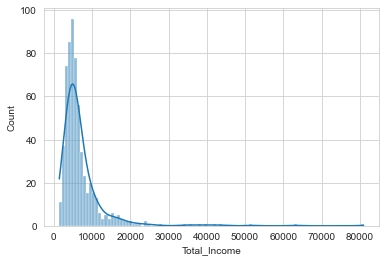

In [24]:
sns.set_style('whitegrid')
sns.histplot(dt['Total_Income'], kde=True)

## Scaling and Normalization of Numerical Attributes

The point of normalization is to change your observations so that they can be described as a normal distribution. The method we're using to normalize here is called the Box-Cox Transformation.

In [25]:
from scipy import stats

<AxesSubplot:xlabel='ApplicantIncomeNorm', ylabel='Count'>

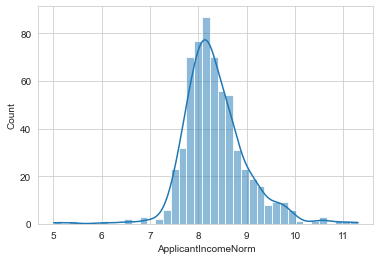

In [26]:
dt['ApplicantIncomeNorm']= stats.boxcox(dt['ApplicantIncome'],0)
sns.histplot(dt['ApplicantIncomeNorm'], kde=True)

We can't normalize Coapplicant income because some of the values are 0 which raises a log0 error.

<AxesSubplot:xlabel='LoanAmountNorm', ylabel='Count'>

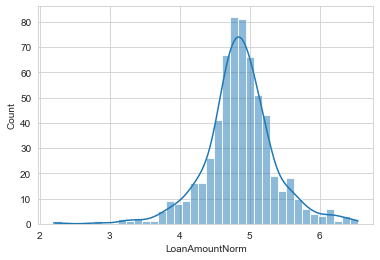

In [27]:
dt['LoanAmountNorm']= stats.boxcox(dt['LoanAmount'],0)
sns.histplot(dt['LoanAmountNorm'], kde=True)

<AxesSubplot:xlabel='Loan_Amount_Term_Norm', ylabel='Count'>

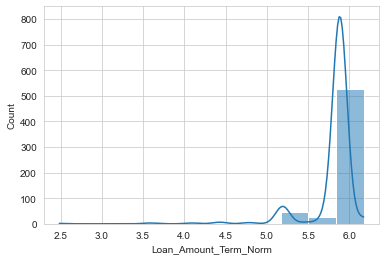

In [28]:
dt['Loan_Amount_Term_Norm']= stats.boxcox(dt['Loan_Amount_Term'],0)
sns.histplot(dt['Loan_Amount_Term_Norm'], kde=True)

<AxesSubplot:xlabel='Loan_Amount_Term_Norm', ylabel='Count'>

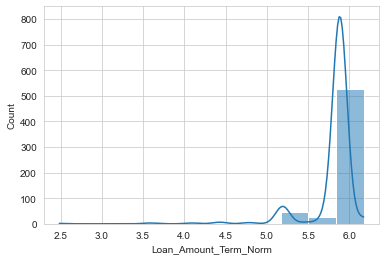

In [29]:
dt['Loan_Amount_Term_Norm']= stats.boxcox(dt['Loan_Amount_Term'],0)
sns.histplot(dt['Loan_Amount_Term_Norm'], kde=True)

<AxesSubplot:xlabel='Total_Income_Norm', ylabel='Count'>

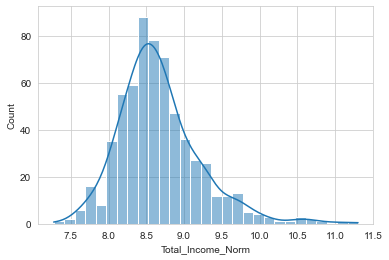

In [30]:
dt['Total_Income_Norm']= stats.boxcox(dt['Total_Income'],0)
sns.histplot(dt['Total_Income_Norm'], kde=True)

 # Feature Selection
 
 ## Correlation Matrix

<AxesSubplot:>

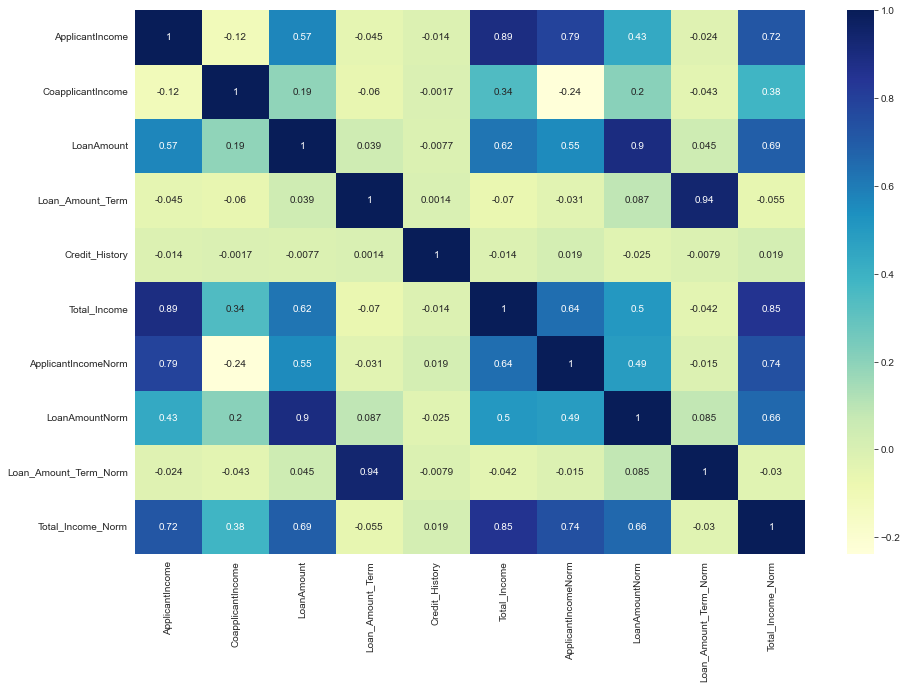

In [31]:
# Using Pearson Correlation

cor = dt.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cor, annot = True, cmap="YlGnBu")

We drop all the original columns which are not normalized. We also drop the 'Loan_ID' column since it is not relevant for prediction.

In [32]:
cols = ['Loan_ID','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income']
dt = dt.drop(columns = cols, axis=1)
dt.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeNorm,LoanAmountNorm,Loan_Amount_Term_Norm,Total_Income_Norm
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,4.986426,5.886104,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,4.852030,5.886104,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,4.189655,5.886104,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,4.787492,5.886104,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,4.948760,5.886104,8.699515


## Ordinal Encoding the Categorical Features

In [33]:
from sklearn.preprocessing import LabelEncoder

# Categorical Attributes

cols = ['Gender','Married','Education','Self_Employed','Property_Area','Dependents','Loan_Status']
label_encoder = LabelEncoder()
for col in cols:
    dt[col] = label_encoder.fit_transform(dt[col])

In [34]:
dt.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeNorm,LoanAmountNorm,Loan_Amount_Term_Norm,Total_Income_Norm
0,1,0,0,0,0,1.0,2,1,8.674026,4.986426,5.886104,8.674026
1,1,1,1,0,0,1.0,0,0,8.430109,4.852030,5.886104,8.714568
2,1,1,0,0,1,1.0,2,1,8.006368,4.189655,5.886104,8.006368
3,1,1,0,1,0,1.0,2,1,7.856707,4.787492,5.886104,8.505323
4,1,0,0,0,0,1.0,2,1,8.699515,4.948760,5.886104,8.699515


# Building the ML Model

First we separate the features from the target variable.

In [35]:
X = dt.drop(columns = ['Loan_Status'],axis=1)
y = dt['Loan_Status']

## Model Training

We define a function that fits the selected machine learning model on the training data and calculates the accuracy and cross-validation score.  

The accuracy is calculated by train-test splitting the data 70-30.  
The cross-validation score is calculated by using 5-fold cross-validation and calculating the mean of the scores.  

We then test different machine learning models using this function.

In [36]:
from sklearn.model_selection import train_test_split,cross_val_score
def classify(model,x,y):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
    model.fit(x_train,y_train)
    print("Accuracy is",model.score(x_test,y_test)*100)
    score = cross_val_score(model,x,y,cv=5)
    print("Cross validation score is",np.mean(score)*100)

### Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model,X,y)

Accuracy is 78.37837837837837
Cross validation score is 80.9462881514061


### Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model,X,y)

Accuracy is 75.67567567567568
Cross validation score is 70.19858723177397


 ### Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model,X,y)

Accuracy is 77.83783783783784
Cross validation score is 78.66586698653872


### Extra Trees

In [40]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model,X,y)

Accuracy is 72.43243243243244
Cross validation score is 77.36638677862186


### XGBoost

In [41]:
from xgboost import XGBClassifier
model = XGBClassifier()
classify(model,X,y)

Accuracy is 77.29729729729729
Cross validation score is 75.5631080900973


### CatBoost

In [42]:
from catboost import CatBoostClassifier
model = CatBoostClassifier()
classify(model,X,y)

Learning rate set to 0.007178
0:	learn: 0.6893245	total: 144ms	remaining: 2m 23s
1:	learn: 0.6855343	total: 145ms	remaining: 1m 12s
2:	learn: 0.6819006	total: 146ms	remaining: 48.6s
3:	learn: 0.6778919	total: 147ms	remaining: 36.7s
4:	learn: 0.6744606	total: 148ms	remaining: 29.5s
5:	learn: 0.6705712	total: 149ms	remaining: 24.8s
6:	learn: 0.6665637	total: 151ms	remaining: 21.4s
7:	learn: 0.6627680	total: 152ms	remaining: 18.9s
8:	learn: 0.6590132	total: 154ms	remaining: 17s
9:	learn: 0.6554328	total: 156ms	remaining: 15.4s
10:	learn: 0.6522869	total: 156ms	remaining: 14.1s
11:	learn: 0.6489514	total: 158ms	remaining: 13s
12:	learn: 0.6453893	total: 159ms	remaining: 12.1s
13:	learn: 0.6417947	total: 160ms	remaining: 11.3s
14:	learn: 0.6384334	total: 161ms	remaining: 10.6s
15:	learn: 0.6355722	total: 162ms	remaining: 9.95s
16:	learn: 0.6326628	total: 163ms	remaining: 9.41s
17:	learn: 0.6294165	total: 164ms	remaining: 8.95s
18:	learn: 0.6263724	total: 165ms	remaining: 8.54s
19:	learn: 0.

233:	learn: 0.3929599	total: 475ms	remaining: 1.55s
234:	learn: 0.3926612	total: 476ms	remaining: 1.55s
235:	learn: 0.3922889	total: 478ms	remaining: 1.55s
236:	learn: 0.3918626	total: 479ms	remaining: 1.54s
237:	learn: 0.3913071	total: 481ms	remaining: 1.54s
238:	learn: 0.3909148	total: 482ms	remaining: 1.53s
239:	learn: 0.3904873	total: 484ms	remaining: 1.53s
240:	learn: 0.3900886	total: 485ms	remaining: 1.53s
241:	learn: 0.3896318	total: 487ms	remaining: 1.52s
242:	learn: 0.3891402	total: 488ms	remaining: 1.52s
243:	learn: 0.3889305	total: 490ms	remaining: 1.52s
244:	learn: 0.3883896	total: 491ms	remaining: 1.51s
245:	learn: 0.3879841	total: 492ms	remaining: 1.51s
246:	learn: 0.3876092	total: 494ms	remaining: 1.5s
247:	learn: 0.3871149	total: 495ms	remaining: 1.5s
248:	learn: 0.3867839	total: 497ms	remaining: 1.5s
249:	learn: 0.3864231	total: 499ms	remaining: 1.5s
250:	learn: 0.3859183	total: 500ms	remaining: 1.49s
251:	learn: 0.3856192	total: 502ms	remaining: 1.49s
252:	learn: 0.38

458:	learn: 0.3211476	total: 811ms	remaining: 956ms
459:	learn: 0.3208357	total: 813ms	remaining: 954ms
460:	learn: 0.3205192	total: 814ms	remaining: 952ms
461:	learn: 0.3203498	total: 816ms	remaining: 950ms
462:	learn: 0.3200961	total: 817ms	remaining: 948ms
463:	learn: 0.3198570	total: 819ms	remaining: 946ms
464:	learn: 0.3197033	total: 820ms	remaining: 943ms
465:	learn: 0.3193090	total: 821ms	remaining: 941ms
466:	learn: 0.3190547	total: 823ms	remaining: 939ms
467:	learn: 0.3187266	total: 824ms	remaining: 937ms
468:	learn: 0.3184120	total: 826ms	remaining: 935ms
469:	learn: 0.3179950	total: 828ms	remaining: 933ms
470:	learn: 0.3178656	total: 829ms	remaining: 931ms
471:	learn: 0.3176410	total: 830ms	remaining: 929ms
472:	learn: 0.3174582	total: 832ms	remaining: 927ms
473:	learn: 0.3172064	total: 833ms	remaining: 924ms
474:	learn: 0.3170136	total: 834ms	remaining: 922ms
475:	learn: 0.3167172	total: 836ms	remaining: 920ms
476:	learn: 0.3164335	total: 837ms	remaining: 918ms
477:	learn: 

702:	learn: 0.2663182	total: 1.15s	remaining: 485ms
703:	learn: 0.2661814	total: 1.15s	remaining: 483ms
704:	learn: 0.2659857	total: 1.15s	remaining: 481ms
705:	learn: 0.2658022	total: 1.15s	remaining: 480ms
706:	learn: 0.2656785	total: 1.15s	remaining: 478ms
707:	learn: 0.2655230	total: 1.15s	remaining: 476ms
708:	learn: 0.2653194	total: 1.16s	remaining: 475ms
709:	learn: 0.2652258	total: 1.16s	remaining: 473ms
710:	learn: 0.2650190	total: 1.16s	remaining: 471ms
711:	learn: 0.2648727	total: 1.16s	remaining: 470ms
712:	learn: 0.2647415	total: 1.16s	remaining: 468ms
713:	learn: 0.2645780	total: 1.16s	remaining: 466ms
714:	learn: 0.2643860	total: 1.17s	remaining: 464ms
715:	learn: 0.2641923	total: 1.17s	remaining: 463ms
716:	learn: 0.2638579	total: 1.17s	remaining: 461ms
717:	learn: 0.2635668	total: 1.17s	remaining: 459ms
718:	learn: 0.2634752	total: 1.17s	remaining: 458ms
719:	learn: 0.2631040	total: 1.17s	remaining: 456ms
720:	learn: 0.2629001	total: 1.17s	remaining: 454ms
721:	learn: 

914:	learn: 0.2290125	total: 1.48s	remaining: 138ms
915:	learn: 0.2289228	total: 1.48s	remaining: 136ms
916:	learn: 0.2287309	total: 1.49s	remaining: 134ms
917:	learn: 0.2285333	total: 1.49s	remaining: 133ms
918:	learn: 0.2283238	total: 1.49s	remaining: 131ms
919:	learn: 0.2280195	total: 1.49s	remaining: 130ms
920:	learn: 0.2278111	total: 1.49s	remaining: 128ms
921:	learn: 0.2275196	total: 1.49s	remaining: 126ms
922:	learn: 0.2274131	total: 1.49s	remaining: 125ms
923:	learn: 0.2271688	total: 1.5s	remaining: 123ms
924:	learn: 0.2269886	total: 1.5s	remaining: 121ms
925:	learn: 0.2268660	total: 1.5s	remaining: 120ms
926:	learn: 0.2267309	total: 1.5s	remaining: 118ms
927:	learn: 0.2265044	total: 1.5s	remaining: 117ms
928:	learn: 0.2262910	total: 1.5s	remaining: 115ms
929:	learn: 0.2261435	total: 1.5s	remaining: 113ms
930:	learn: 0.2260729	total: 1.51s	remaining: 112ms
931:	learn: 0.2258632	total: 1.51s	remaining: 110ms
932:	learn: 0.2257022	total: 1.51s	remaining: 108ms
933:	learn: 0.22560

101:	learn: 0.4852702	total: 184ms	remaining: 1.62s
102:	learn: 0.4841972	total: 185ms	remaining: 1.61s
103:	learn: 0.4829814	total: 187ms	remaining: 1.61s
104:	learn: 0.4817922	total: 188ms	remaining: 1.6s
105:	learn: 0.4804198	total: 189ms	remaining: 1.6s
106:	learn: 0.4796546	total: 191ms	remaining: 1.59s
107:	learn: 0.4789877	total: 192ms	remaining: 1.59s
108:	learn: 0.4779130	total: 194ms	remaining: 1.58s
109:	learn: 0.4768199	total: 195ms	remaining: 1.58s
110:	learn: 0.4761728	total: 197ms	remaining: 1.58s
111:	learn: 0.4757983	total: 198ms	remaining: 1.57s
112:	learn: 0.4746903	total: 199ms	remaining: 1.56s
113:	learn: 0.4737442	total: 201ms	remaining: 1.56s
114:	learn: 0.4729261	total: 202ms	remaining: 1.55s
115:	learn: 0.4716523	total: 203ms	remaining: 1.55s
116:	learn: 0.4707775	total: 205ms	remaining: 1.54s
117:	learn: 0.4700186	total: 206ms	remaining: 1.54s
118:	learn: 0.4694144	total: 208ms	remaining: 1.54s
119:	learn: 0.4683951	total: 209ms	remaining: 1.53s
120:	learn: 0.

334:	learn: 0.3688318	total: 519ms	remaining: 1.03s
335:	learn: 0.3687211	total: 520ms	remaining: 1.03s
336:	learn: 0.3682570	total: 522ms	remaining: 1.03s
337:	learn: 0.3677997	total: 523ms	remaining: 1.02s
338:	learn: 0.3675407	total: 525ms	remaining: 1.02s
339:	learn: 0.3673604	total: 526ms	remaining: 1.02s
340:	learn: 0.3670684	total: 528ms	remaining: 1.02s
341:	learn: 0.3667830	total: 529ms	remaining: 1.02s
342:	learn: 0.3663305	total: 530ms	remaining: 1.01s
343:	learn: 0.3659231	total: 532ms	remaining: 1.01s
344:	learn: 0.3653828	total: 534ms	remaining: 1.01s
345:	learn: 0.3649808	total: 536ms	remaining: 1.01s
346:	learn: 0.3647420	total: 537ms	remaining: 1.01s
347:	learn: 0.3643967	total: 539ms	remaining: 1.01s
348:	learn: 0.3642235	total: 540ms	remaining: 1.01s
349:	learn: 0.3638649	total: 542ms	remaining: 1.01s
350:	learn: 0.3635191	total: 543ms	remaining: 1s
351:	learn: 0.3629990	total: 544ms	remaining: 1s
352:	learn: 0.3624942	total: 546ms	remaining: 1s
353:	learn: 0.3622083

563:	learn: 0.3058995	total: 856ms	remaining: 662ms
564:	learn: 0.3056652	total: 858ms	remaining: 661ms
565:	learn: 0.3055331	total: 859ms	remaining: 659ms
566:	learn: 0.3052120	total: 861ms	remaining: 658ms
567:	learn: 0.3048865	total: 862ms	remaining: 656ms
568:	learn: 0.3046323	total: 864ms	remaining: 654ms
569:	learn: 0.3045523	total: 866ms	remaining: 653ms
570:	learn: 0.3042769	total: 867ms	remaining: 651ms
571:	learn: 0.3040124	total: 869ms	remaining: 650ms
572:	learn: 0.3038841	total: 870ms	remaining: 649ms
573:	learn: 0.3037420	total: 871ms	remaining: 647ms
574:	learn: 0.3035188	total: 873ms	remaining: 645ms
575:	learn: 0.3032400	total: 874ms	remaining: 643ms
576:	learn: 0.3030023	total: 875ms	remaining: 642ms
577:	learn: 0.3026385	total: 877ms	remaining: 640ms
578:	learn: 0.3024620	total: 878ms	remaining: 638ms
579:	learn: 0.3022181	total: 879ms	remaining: 637ms
580:	learn: 0.3020152	total: 881ms	remaining: 635ms
581:	learn: 0.3018243	total: 883ms	remaining: 634ms
582:	learn: 

806:	learn: 0.2556049	total: 1.19s	remaining: 285ms
807:	learn: 0.2553220	total: 1.19s	remaining: 283ms
808:	learn: 0.2551816	total: 1.19s	remaining: 282ms
809:	learn: 0.2548461	total: 1.2s	remaining: 280ms
810:	learn: 0.2546713	total: 1.2s	remaining: 279ms
811:	learn: 0.2543508	total: 1.2s	remaining: 277ms
812:	learn: 0.2541190	total: 1.2s	remaining: 276ms
813:	learn: 0.2539067	total: 1.2s	remaining: 274ms
814:	learn: 0.2537109	total: 1.2s	remaining: 273ms
815:	learn: 0.2535179	total: 1.2s	remaining: 272ms
816:	learn: 0.2533674	total: 1.21s	remaining: 270ms
817:	learn: 0.2530298	total: 1.21s	remaining: 269ms
818:	learn: 0.2528546	total: 1.21s	remaining: 267ms
819:	learn: 0.2527172	total: 1.21s	remaining: 266ms
820:	learn: 0.2524894	total: 1.21s	remaining: 264ms
821:	learn: 0.2522755	total: 1.21s	remaining: 263ms
822:	learn: 0.2518832	total: 1.21s	remaining: 261ms
823:	learn: 0.2516742	total: 1.22s	remaining: 260ms
824:	learn: 0.2515787	total: 1.22s	remaining: 258ms
825:	learn: 0.25128

18:	learn: 0.6240838	total: 25.1ms	remaining: 1.29s
19:	learn: 0.6210614	total: 26.6ms	remaining: 1.3s
20:	learn: 0.6178212	total: 28ms	remaining: 1.31s
21:	learn: 0.6151026	total: 28.8ms	remaining: 1.28s
22:	learn: 0.6119631	total: 30.1ms	remaining: 1.28s
23:	learn: 0.6087925	total: 31.6ms	remaining: 1.28s
24:	learn: 0.6055136	total: 33.1ms	remaining: 1.29s
25:	learn: 0.6027743	total: 34.2ms	remaining: 1.28s
26:	learn: 0.6001041	total: 35.8ms	remaining: 1.29s
27:	learn: 0.5974061	total: 36.9ms	remaining: 1.28s
28:	learn: 0.5950101	total: 38.3ms	remaining: 1.28s
29:	learn: 0.5924826	total: 39.4ms	remaining: 1.27s
30:	learn: 0.5907604	total: 40.1ms	remaining: 1.25s
31:	learn: 0.5875288	total: 41.5ms	remaining: 1.26s
32:	learn: 0.5848207	total: 43.1ms	remaining: 1.26s
33:	learn: 0.5826209	total: 43.8ms	remaining: 1.24s
34:	learn: 0.5802284	total: 44.6ms	remaining: 1.23s
35:	learn: 0.5773787	total: 46ms	remaining: 1.23s
36:	learn: 0.5748798	total: 47.3ms	remaining: 1.23s
37:	learn: 0.5725

269:	learn: 0.3801332	total: 361ms	remaining: 977ms
270:	learn: 0.3798856	total: 363ms	remaining: 977ms
271:	learn: 0.3794733	total: 365ms	remaining: 976ms
272:	learn: 0.3791232	total: 366ms	remaining: 976ms
273:	learn: 0.3787552	total: 368ms	remaining: 975ms
274:	learn: 0.3785466	total: 370ms	remaining: 975ms
275:	learn: 0.3781203	total: 371ms	remaining: 974ms
276:	learn: 0.3776799	total: 373ms	remaining: 974ms
277:	learn: 0.3774221	total: 375ms	remaining: 974ms
278:	learn: 0.3770450	total: 381ms	remaining: 984ms
279:	learn: 0.3766375	total: 382ms	remaining: 983ms
280:	learn: 0.3764216	total: 384ms	remaining: 982ms
281:	learn: 0.3762552	total: 385ms	remaining: 981ms
282:	learn: 0.3758329	total: 387ms	remaining: 980ms
283:	learn: 0.3755248	total: 388ms	remaining: 979ms
284:	learn: 0.3752386	total: 390ms	remaining: 978ms
285:	learn: 0.3748450	total: 391ms	remaining: 977ms
286:	learn: 0.3746013	total: 393ms	remaining: 975ms
287:	learn: 0.3743591	total: 394ms	remaining: 974ms
288:	learn: 

508:	learn: 0.3145779	total: 699ms	remaining: 674ms
509:	learn: 0.3141320	total: 700ms	remaining: 673ms
510:	learn: 0.3140968	total: 701ms	remaining: 671ms
511:	learn: 0.3137308	total: 703ms	remaining: 670ms
512:	learn: 0.3134635	total: 704ms	remaining: 668ms
513:	learn: 0.3134298	total: 705ms	remaining: 667ms
514:	learn: 0.3131753	total: 706ms	remaining: 665ms
515:	learn: 0.3130582	total: 708ms	remaining: 664ms
516:	learn: 0.3129872	total: 709ms	remaining: 663ms
517:	learn: 0.3126390	total: 711ms	remaining: 662ms
518:	learn: 0.3124576	total: 713ms	remaining: 661ms
519:	learn: 0.3122173	total: 714ms	remaining: 659ms
520:	learn: 0.3121002	total: 716ms	remaining: 658ms
521:	learn: 0.3119793	total: 717ms	remaining: 657ms
522:	learn: 0.3118594	total: 718ms	remaining: 655ms
523:	learn: 0.3116960	total: 720ms	remaining: 654ms
524:	learn: 0.3114276	total: 721ms	remaining: 652ms
525:	learn: 0.3112218	total: 722ms	remaining: 651ms
526:	learn: 0.3109660	total: 724ms	remaining: 650ms
527:	learn: 

749:	learn: 0.2651055	total: 1.03s	remaining: 345ms
750:	learn: 0.2649445	total: 1.04s	remaining: 344ms
751:	learn: 0.2647245	total: 1.04s	remaining: 342ms
752:	learn: 0.2645585	total: 1.04s	remaining: 341ms
753:	learn: 0.2644140	total: 1.04s	remaining: 340ms
754:	learn: 0.2641760	total: 1.04s	remaining: 338ms
755:	learn: 0.2639116	total: 1.04s	remaining: 337ms
756:	learn: 0.2637279	total: 1.04s	remaining: 336ms
757:	learn: 0.2635980	total: 1.05s	remaining: 334ms
758:	learn: 0.2633621	total: 1.05s	remaining: 333ms
759:	learn: 0.2632536	total: 1.05s	remaining: 332ms
760:	learn: 0.2630902	total: 1.05s	remaining: 330ms
761:	learn: 0.2628986	total: 1.05s	remaining: 329ms
762:	learn: 0.2628328	total: 1.05s	remaining: 328ms
763:	learn: 0.2627052	total: 1.06s	remaining: 326ms
764:	learn: 0.2626080	total: 1.06s	remaining: 325ms
765:	learn: 0.2624075	total: 1.06s	remaining: 324ms
766:	learn: 0.2622401	total: 1.06s	remaining: 323ms
767:	learn: 0.2620967	total: 1.06s	remaining: 321ms
768:	learn: 

988:	learn: 0.2266614	total: 1.37s	remaining: 15.3ms
989:	learn: 0.2265606	total: 1.37s	remaining: 13.9ms
990:	learn: 0.2264465	total: 1.37s	remaining: 12.5ms
991:	learn: 0.2263171	total: 1.38s	remaining: 11.1ms
992:	learn: 0.2260936	total: 1.38s	remaining: 9.71ms
993:	learn: 0.2260048	total: 1.38s	remaining: 8.32ms
994:	learn: 0.2259377	total: 1.38s	remaining: 6.94ms
995:	learn: 0.2258280	total: 1.38s	remaining: 5.55ms
996:	learn: 0.2257011	total: 1.38s	remaining: 4.16ms
997:	learn: 0.2256773	total: 1.39s	remaining: 2.77ms
998:	learn: 0.2256260	total: 1.39s	remaining: 1.39ms
999:	learn: 0.2255766	total: 1.39s	remaining: 0us
Learning rate set to 0.007604
0:	learn: 0.6890165	total: 17.7ms	remaining: 17.7s
1:	learn: 0.6846250	total: 19.1ms	remaining: 9.55s
2:	learn: 0.6806333	total: 20.4ms	remaining: 6.77s
3:	learn: 0.6767152	total: 21.1ms	remaining: 5.26s
4:	learn: 0.6722974	total: 22.3ms	remaining: 4.45s
5:	learn: 0.6681981	total: 23.8ms	remaining: 3.94s
6:	learn: 0.6643448	total: 25.1

199:	learn: 0.4062001	total: 279ms	remaining: 1.11s
200:	learn: 0.4059690	total: 280ms	remaining: 1.11s
201:	learn: 0.4058039	total: 281ms	remaining: 1.11s
202:	learn: 0.4053348	total: 282ms	remaining: 1.11s
203:	learn: 0.4050510	total: 284ms	remaining: 1.11s
204:	learn: 0.4043109	total: 286ms	remaining: 1.11s
205:	learn: 0.4039950	total: 287ms	remaining: 1.11s
206:	learn: 0.4034377	total: 289ms	remaining: 1.11s
207:	learn: 0.4031269	total: 290ms	remaining: 1.1s
208:	learn: 0.4027616	total: 292ms	remaining: 1.1s
209:	learn: 0.4024892	total: 294ms	remaining: 1.1s
210:	learn: 0.4019039	total: 295ms	remaining: 1.1s
211:	learn: 0.4014694	total: 297ms	remaining: 1.1s
212:	learn: 0.4010398	total: 298ms	remaining: 1.1s
213:	learn: 0.4008930	total: 300ms	remaining: 1.1s
214:	learn: 0.4008166	total: 301ms	remaining: 1.1s
215:	learn: 0.4002832	total: 302ms	remaining: 1.09s
216:	learn: 0.3998433	total: 303ms	remaining: 1.09s
217:	learn: 0.3993048	total: 305ms	remaining: 1.09s
218:	learn: 0.398641

434:	learn: 0.3307668	total: 616ms	remaining: 800ms
435:	learn: 0.3305280	total: 618ms	remaining: 799ms
436:	learn: 0.3303421	total: 620ms	remaining: 798ms
437:	learn: 0.3302207	total: 621ms	remaining: 797ms
438:	learn: 0.3300830	total: 623ms	remaining: 796ms
439:	learn: 0.3297962	total: 624ms	remaining: 795ms
440:	learn: 0.3295175	total: 626ms	remaining: 793ms
441:	learn: 0.3293002	total: 628ms	remaining: 792ms
442:	learn: 0.3291781	total: 629ms	remaining: 791ms
443:	learn: 0.3290080	total: 631ms	remaining: 790ms
444:	learn: 0.3289339	total: 632ms	remaining: 789ms
445:	learn: 0.3286192	total: 634ms	remaining: 787ms
446:	learn: 0.3283231	total: 635ms	remaining: 786ms
447:	learn: 0.3281258	total: 636ms	remaining: 784ms
448:	learn: 0.3276772	total: 638ms	remaining: 783ms
449:	learn: 0.3274715	total: 639ms	remaining: 781ms
450:	learn: 0.3272010	total: 640ms	remaining: 779ms
451:	learn: 0.3270309	total: 642ms	remaining: 778ms
452:	learn: 0.3268836	total: 643ms	remaining: 777ms
453:	learn: 

669:	learn: 0.2815361	total: 953ms	remaining: 470ms
670:	learn: 0.2813766	total: 955ms	remaining: 468ms
671:	learn: 0.2811866	total: 957ms	remaining: 467ms
672:	learn: 0.2809368	total: 958ms	remaining: 466ms
673:	learn: 0.2807446	total: 960ms	remaining: 464ms
674:	learn: 0.2805329	total: 961ms	remaining: 463ms
675:	learn: 0.2804064	total: 963ms	remaining: 461ms
676:	learn: 0.2802452	total: 964ms	remaining: 460ms
677:	learn: 0.2800585	total: 966ms	remaining: 459ms
678:	learn: 0.2798576	total: 968ms	remaining: 457ms
679:	learn: 0.2796012	total: 969ms	remaining: 456ms
680:	learn: 0.2793223	total: 971ms	remaining: 455ms
681:	learn: 0.2791668	total: 972ms	remaining: 453ms
682:	learn: 0.2791640	total: 973ms	remaining: 452ms
683:	learn: 0.2790572	total: 975ms	remaining: 450ms
684:	learn: 0.2789522	total: 976ms	remaining: 449ms
685:	learn: 0.2787283	total: 978ms	remaining: 447ms
686:	learn: 0.2785439	total: 979ms	remaining: 446ms
687:	learn: 0.2782732	total: 981ms	remaining: 445ms
688:	learn: 

903:	learn: 0.2422362	total: 1.29s	remaining: 137ms
904:	learn: 0.2420867	total: 1.29s	remaining: 136ms
905:	learn: 0.2418753	total: 1.29s	remaining: 134ms
906:	learn: 0.2418422	total: 1.29s	remaining: 133ms
907:	learn: 0.2417877	total: 1.29s	remaining: 131ms
908:	learn: 0.2416885	total: 1.3s	remaining: 130ms
909:	learn: 0.2415924	total: 1.3s	remaining: 128ms
910:	learn: 0.2413587	total: 1.3s	remaining: 127ms
911:	learn: 0.2411797	total: 1.3s	remaining: 126ms
912:	learn: 0.2410030	total: 1.3s	remaining: 124ms
913:	learn: 0.2408272	total: 1.3s	remaining: 123ms
914:	learn: 0.2406720	total: 1.31s	remaining: 121ms
915:	learn: 0.2405679	total: 1.31s	remaining: 120ms
916:	learn: 0.2403399	total: 1.31s	remaining: 119ms
917:	learn: 0.2401387	total: 1.31s	remaining: 117ms
918:	learn: 0.2400230	total: 1.31s	remaining: 116ms
919:	learn: 0.2398371	total: 1.31s	remaining: 114ms
920:	learn: 0.2397720	total: 1.32s	remaining: 113ms
921:	learn: 0.2397490	total: 1.32s	remaining: 112ms
922:	learn: 0.2395

126:	learn: 0.4747188	total: 186ms	remaining: 1.28s
127:	learn: 0.4738689	total: 188ms	remaining: 1.28s
128:	learn: 0.4730693	total: 189ms	remaining: 1.28s
129:	learn: 0.4722891	total: 191ms	remaining: 1.28s
130:	learn: 0.4712977	total: 193ms	remaining: 1.28s
131:	learn: 0.4704461	total: 194ms	remaining: 1.28s
132:	learn: 0.4697078	total: 196ms	remaining: 1.28s
133:	learn: 0.4689002	total: 197ms	remaining: 1.27s
134:	learn: 0.4680123	total: 199ms	remaining: 1.27s
135:	learn: 0.4671651	total: 201ms	remaining: 1.27s
136:	learn: 0.4664901	total: 202ms	remaining: 1.27s
137:	learn: 0.4656887	total: 204ms	remaining: 1.27s
138:	learn: 0.4649922	total: 205ms	remaining: 1.27s
139:	learn: 0.4646785	total: 206ms	remaining: 1.26s
140:	learn: 0.4636910	total: 207ms	remaining: 1.26s
141:	learn: 0.4628358	total: 209ms	remaining: 1.26s
142:	learn: 0.4627007	total: 210ms	remaining: 1.26s
143:	learn: 0.4616923	total: 211ms	remaining: 1.25s
144:	learn: 0.4610863	total: 213ms	remaining: 1.25s
145:	learn: 

357:	learn: 0.3701422	total: 522ms	remaining: 936ms
358:	learn: 0.3698517	total: 524ms	remaining: 935ms
359:	learn: 0.3698230	total: 525ms	remaining: 933ms
360:	learn: 0.3695294	total: 526ms	remaining: 932ms
361:	learn: 0.3690805	total: 528ms	remaining: 930ms
362:	learn: 0.3690371	total: 529ms	remaining: 927ms
363:	learn: 0.3687440	total: 530ms	remaining: 926ms
364:	learn: 0.3683618	total: 531ms	remaining: 925ms
365:	learn: 0.3683503	total: 532ms	remaining: 922ms
366:	learn: 0.3681641	total: 534ms	remaining: 920ms
367:	learn: 0.3677746	total: 535ms	remaining: 919ms
368:	learn: 0.3675035	total: 537ms	remaining: 918ms
369:	learn: 0.3673768	total: 538ms	remaining: 916ms
370:	learn: 0.3671155	total: 540ms	remaining: 915ms
371:	learn: 0.3668598	total: 541ms	remaining: 914ms
372:	learn: 0.3664764	total: 543ms	remaining: 912ms
373:	learn: 0.3662354	total: 544ms	remaining: 910ms
374:	learn: 0.3659951	total: 545ms	remaining: 909ms
375:	learn: 0.3656962	total: 547ms	remaining: 907ms
376:	learn: 

587:	learn: 0.3155522	total: 861ms	remaining: 603ms
588:	learn: 0.3153537	total: 862ms	remaining: 602ms
589:	learn: 0.3151531	total: 864ms	remaining: 600ms
590:	learn: 0.3147997	total: 865ms	remaining: 599ms
591:	learn: 0.3146164	total: 867ms	remaining: 597ms
592:	learn: 0.3143594	total: 868ms	remaining: 596ms
593:	learn: 0.3140915	total: 870ms	remaining: 594ms
594:	learn: 0.3139224	total: 871ms	remaining: 593ms
595:	learn: 0.3137580	total: 873ms	remaining: 591ms
596:	learn: 0.3134283	total: 874ms	remaining: 590ms
597:	learn: 0.3132044	total: 876ms	remaining: 589ms
598:	learn: 0.3130779	total: 877ms	remaining: 587ms
599:	learn: 0.3126773	total: 879ms	remaining: 586ms
600:	learn: 0.3125245	total: 880ms	remaining: 584ms
601:	learn: 0.3122394	total: 881ms	remaining: 583ms
602:	learn: 0.3120110	total: 883ms	remaining: 581ms
603:	learn: 0.3117894	total: 884ms	remaining: 580ms
604:	learn: 0.3116653	total: 886ms	remaining: 578ms
605:	learn: 0.3115146	total: 887ms	remaining: 577ms
606:	learn: 

822:	learn: 0.2689059	total: 1.2s	remaining: 258ms
823:	learn: 0.2687342	total: 1.2s	remaining: 256ms
824:	learn: 0.2686502	total: 1.2s	remaining: 255ms
825:	learn: 0.2684599	total: 1.2s	remaining: 253ms
826:	learn: 0.2682066	total: 1.2s	remaining: 252ms
827:	learn: 0.2679600	total: 1.21s	remaining: 251ms
828:	learn: 0.2678292	total: 1.21s	remaining: 249ms
829:	learn: 0.2676290	total: 1.21s	remaining: 248ms
830:	learn: 0.2673209	total: 1.21s	remaining: 246ms
831:	learn: 0.2672492	total: 1.21s	remaining: 245ms
832:	learn: 0.2672263	total: 1.21s	remaining: 243ms
833:	learn: 0.2670667	total: 1.21s	remaining: 242ms
834:	learn: 0.2668002	total: 1.22s	remaining: 240ms
835:	learn: 0.2665709	total: 1.22s	remaining: 239ms
836:	learn: 0.2663838	total: 1.22s	remaining: 237ms
837:	learn: 0.2661227	total: 1.22s	remaining: 236ms
838:	learn: 0.2659680	total: 1.22s	remaining: 235ms
839:	learn: 0.2658860	total: 1.22s	remaining: 233ms
840:	learn: 0.2656954	total: 1.22s	remaining: 232ms
841:	learn: 0.265

29:	learn: 0.5984731	total: 37.2ms	remaining: 1.2s
30:	learn: 0.5963689	total: 37.9ms	remaining: 1.18s
31:	learn: 0.5936782	total: 39.4ms	remaining: 1.19s
32:	learn: 0.5916478	total: 40ms	remaining: 1.17s
33:	learn: 0.5894721	total: 40.9ms	remaining: 1.16s
34:	learn: 0.5872016	total: 42.3ms	remaining: 1.17s
35:	learn: 0.5849137	total: 43.7ms	remaining: 1.17s
36:	learn: 0.5825951	total: 45ms	remaining: 1.17s
37:	learn: 0.5807398	total: 45.7ms	remaining: 1.16s
38:	learn: 0.5789159	total: 46.3ms	remaining: 1.14s
39:	learn: 0.5770566	total: 47.4ms	remaining: 1.14s
40:	learn: 0.5748963	total: 49ms	remaining: 1.15s
41:	learn: 0.5731652	total: 49.8ms	remaining: 1.14s
42:	learn: 0.5716788	total: 51.3ms	remaining: 1.14s
43:	learn: 0.5696472	total: 52.6ms	remaining: 1.14s
44:	learn: 0.5676591	total: 53.8ms	remaining: 1.14s
45:	learn: 0.5658930	total: 54.8ms	remaining: 1.14s
46:	learn: 0.5639032	total: 56.1ms	remaining: 1.14s
47:	learn: 0.5617118	total: 57.4ms	remaining: 1.14s
48:	learn: 0.559630

282:	learn: 0.3839701	total: 374ms	remaining: 947ms
283:	learn: 0.3836915	total: 375ms	remaining: 946ms
284:	learn: 0.3833454	total: 377ms	remaining: 945ms
285:	learn: 0.3830090	total: 378ms	remaining: 944ms
286:	learn: 0.3826690	total: 379ms	remaining: 942ms
287:	learn: 0.3822200	total: 381ms	remaining: 941ms
288:	learn: 0.3820422	total: 382ms	remaining: 940ms
289:	learn: 0.3818266	total: 384ms	remaining: 940ms
290:	learn: 0.3814489	total: 385ms	remaining: 939ms
291:	learn: 0.3813336	total: 387ms	remaining: 937ms
292:	learn: 0.3807937	total: 388ms	remaining: 937ms
293:	learn: 0.3801730	total: 390ms	remaining: 936ms
294:	learn: 0.3796848	total: 391ms	remaining: 935ms
295:	learn: 0.3793586	total: 393ms	remaining: 935ms
296:	learn: 0.3791441	total: 394ms	remaining: 933ms
297:	learn: 0.3788841	total: 396ms	remaining: 933ms
298:	learn: 0.3784559	total: 397ms	remaining: 931ms
299:	learn: 0.3780523	total: 399ms	remaining: 930ms
300:	learn: 0.3775977	total: 400ms	remaining: 929ms
301:	learn: 

522:	learn: 0.3141110	total: 713ms	remaining: 650ms
523:	learn: 0.3138988	total: 714ms	remaining: 649ms
524:	learn: 0.3135967	total: 716ms	remaining: 648ms
525:	learn: 0.3133266	total: 717ms	remaining: 646ms
526:	learn: 0.3131796	total: 719ms	remaining: 645ms
527:	learn: 0.3129552	total: 720ms	remaining: 644ms
528:	learn: 0.3127877	total: 722ms	remaining: 643ms
529:	learn: 0.3124766	total: 723ms	remaining: 641ms
530:	learn: 0.3122026	total: 725ms	remaining: 640ms
531:	learn: 0.3118997	total: 726ms	remaining: 639ms
532:	learn: 0.3117870	total: 727ms	remaining: 637ms
533:	learn: 0.3116628	total: 729ms	remaining: 636ms
534:	learn: 0.3114859	total: 730ms	remaining: 635ms
535:	learn: 0.3110758	total: 731ms	remaining: 633ms
536:	learn: 0.3109896	total: 733ms	remaining: 632ms
537:	learn: 0.3109068	total: 734ms	remaining: 630ms
538:	learn: 0.3105600	total: 735ms	remaining: 629ms
539:	learn: 0.3100227	total: 736ms	remaining: 627ms
540:	learn: 0.3099206	total: 738ms	remaining: 626ms
541:	learn: 

768:	learn: 0.2621200	total: 1.05s	remaining: 315ms
769:	learn: 0.2620003	total: 1.05s	remaining: 314ms
770:	learn: 0.2618181	total: 1.05s	remaining: 313ms
771:	learn: 0.2616743	total: 1.05s	remaining: 311ms
772:	learn: 0.2614698	total: 1.05s	remaining: 310ms
773:	learn: 0.2614363	total: 1.06s	remaining: 309ms
774:	learn: 0.2612388	total: 1.06s	remaining: 307ms
775:	learn: 0.2609530	total: 1.06s	remaining: 306ms
776:	learn: 0.2607318	total: 1.06s	remaining: 305ms
777:	learn: 0.2605815	total: 1.06s	remaining: 303ms
778:	learn: 0.2604988	total: 1.06s	remaining: 302ms
779:	learn: 0.2603217	total: 1.06s	remaining: 301ms
780:	learn: 0.2600236	total: 1.07s	remaining: 299ms
781:	learn: 0.2598426	total: 1.07s	remaining: 298ms
782:	learn: 0.2595655	total: 1.07s	remaining: 297ms
783:	learn: 0.2592633	total: 1.07s	remaining: 295ms
784:	learn: 0.2591281	total: 1.07s	remaining: 294ms
785:	learn: 0.2588575	total: 1.07s	remaining: 292ms
786:	learn: 0.2586719	total: 1.07s	remaining: 291ms
787:	learn: 

993:	learn: 0.2223659	total: 1.39s	remaining: 8.39ms
994:	learn: 0.2221854	total: 1.39s	remaining: 6.99ms
995:	learn: 0.2219967	total: 1.39s	remaining: 5.59ms
996:	learn: 0.2217890	total: 1.39s	remaining: 4.19ms
997:	learn: 0.2215845	total: 1.4s	remaining: 2.79ms
998:	learn: 0.2214497	total: 1.4s	remaining: 1.4ms
999:	learn: 0.2213074	total: 1.4s	remaining: 0us
Cross validation score is 80.29454884712781


# Hyperparameter Tuning

Randomized Search is used to find the best hyperparameters for the various classifiers.  

We define a function that tunes the selected parameters for the particular classifier. The scoring metric is accuracy, the number of iterations is 10 and we use  5-fold cross-validation resulting in 50 fits of the algorithm. We also use 1 core of the CPU for this.  
The best score obtained and the best parameters needed to be selected to obtain the aforementioned score is reported.  

We then test different machine learning models using this function.


In [43]:
from sklearn.model_selection import RandomizedSearchCV
def tune(estimator,param_distributions,x,y):
    rscv = RandomizedSearchCV(estimator = estimator,param_distributions = param_distributions, scoring = 'accuracy', n_iter=10, cv=5, verbose=2, random_state=42, n_jobs = 1)
    rscv.fit(x,y)
    print("\n" * 3)
    print("The best score is",rscv.best_score_*100)
    print("The best parameters are",rscv.best_params_)
    return rscv

### Random Forest

In [44]:
n_estimators = [int(x) for x in np.linspace(100,1200,12)] #number of trees in random forest
max_features = ['auto','sqrt'] #no of features considered at every split
max_depth = [int(x) for x in np.linspace(5,30,6)] #maximum levels in the tree
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [45]:
random_grid = {'n_estimators':n_estimators,'max_features':max_features,
              'max_depth':max_depth, 'min_samples_split':min_samples_split, 'min_samples_leaf':min_samples_leaf}

rf = RandomForestClassifier()
rf = tune(rf,random_grid,X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

We obtain a score which is much higher than before and the best hyperparameters are n_estimators= 700, min_samples_split= 5, min_samples_leaf= 10, max_features= auto and max_depth = 20.

### Decision Tree

In [46]:
max_features = ['auto','sqrt'] #no of features considered at every split
max_depth = [int(x) for x in np.linspace(5,30,6)] #maximum levels in the tree
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [47]:
random_grid = {'max_features':max_features,'max_depth':max_depth, 
               'min_samples_split':min_samples_split, 'min_samples_leaf':min_samples_leaf}

dt = DecisionTreeClassifier()
dt = tune(dt,random_grid,X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5

We obtain a score which is much higher than before and the best hyperparameters are min_samples_split= 100, min_samples_leaf= 2, max_features= sqrt and max_depth = 15.

### Extra Trees

In [48]:
n_estimators = [int(x) for x in np.linspace(100,1200,12)] #number of trees in extra trees
max_features = ['auto','sqrt'] #no of features considered at every split
max_depth = [int(x) for x in np.linspace(5,30,6)] #maximum levels in the tree
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [49]:
random_grid = {'n_estimators':n_estimators,'max_features':max_features,
              'max_depth':max_depth, 'min_samples_split':min_samples_split, 'min_samples_leaf':min_samples_leaf}

et = ExtraTreesClassifier()
et = tune(et,random_grid,X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

We obtain a score which is much higher than before and the best hyperparameters are n_estimators= 900, min_samples_split= 5, min_samples_leaf= 5, max_features= sqrt and max_depth = 10.

### XGBoost

In [50]:
from scipy.stats import uniform, randint
gamma = uniform(0,0.5)
learning_rate = uniform(0.03,0.3)
max_depth = randint(2,6) #default 3
n_estimators = randint(100,150) #default 100
subsample = uniform(0.6,0.4)

In [51]:
random_grid = {'gamma':gamma,'learning_rate':learning_rate,
              'max_depth':max_depth, 'n_estimators':n_estimators, 'subsample':subsample}

xgb = XGBClassifier()
xgb = tune(xgb,random_grid,X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[CV] END gamma=0.07800932022121826, learning_rate=0.07679835610086079, max_depth=4, n_estimators=110, subsample=0.9464704583099741; total time=   0.0s
[CV] END gamma=0.07800932022121826, le

We obtain a score which is much higher than before and the best hyperparameters are gamma= 0.30582658024414044, learning_rate= 0.03211989156591522, max_depth= 2, n_estimators= 148 and subsample= 0.8099098641033556.

# Confusion Matrix

We plot the confusion matrices for the various hyperparameter tuned classifiers.

In [52]:
from sklearn.metrics import confusion_matrix
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

### Decision Tree

<AxesSubplot:>

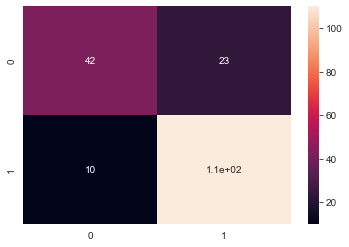

In [53]:
y_pred = dt.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)

### Random Forest

<AxesSubplot:>

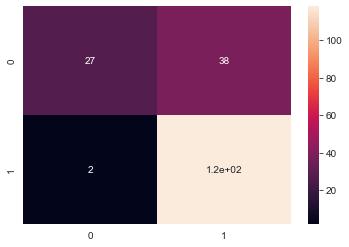

In [54]:
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)

### Extra Trees

<AxesSubplot:>

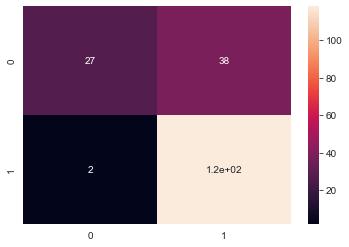

In [55]:
y_pred = et.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)

### XGBoost

<AxesSubplot:>

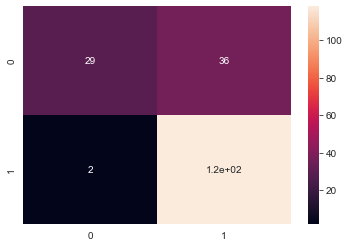

In [56]:
y_pred = xgb.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)